In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

def simulate_delta_method(mu1=1, mu2=2, sigma1=0.5, sigma2=0.3, n=100, n_simulations=10000):
    """
    Simulate the Delta Method for the ratio of two means.
    
    Parameters:
    -----------
    mu1, mu2 : float
        True means of the two populations
    sigma1, sigma2 : float
        True standard deviations of the two populations
    n : int
        Sample size for each sample
    n_simulations : int
        Number of simulation iterations
    """
    # Store the ratios
    ratios = np.zeros(n_simulations)
    
    # Theoretical variance from Delta Method
    theoretical_var = (1/mu2**2) * (sigma1**2/n) + (mu1**2/mu2**4) * (sigma2**2/n)
    theoretical_std = np.sqrt(theoretical_var)
    
    # Run simulations
    for i in range(n_simulations):
        # Generate samples
        X = np.random.normal(mu1, sigma1, n)
        Y = np.random.normal(mu2, sigma2, n)
        
        # Calculate sample means
        X_bar = np.mean(X)
        Y_bar = np.mean(Y)
        
        # Calculate ratio
        ratios[i] = X_bar / Y_bar
    
    # Create the plot
    plt.figure(figsize=(12, 8))
    
    # Plot histogram of simulated ratios
    plt.hist(ratios, bins=50, density=True, alpha=0.5, label='Simulated ratios')
    
    # Plot theoretical normal distribution
    x = np.linspace(mu1/mu2 - 4*theoretical_std, mu1/mu2 + 4*theoretical_std, 100)
    y = stats.norm.pdf(x, mu1/mu2, theoretical_std)
    plt.plot(x, y, 'r-', lw=2, label='Theoretical normal (Delta Method)')
    
    # Add vertical line for true ratio
    plt.axvline(mu1/mu2, color='k', linestyle='--', label='True ratio')
    
    plt.title(f'Delta Method Approximation (n={n})\n' + 
             f'μ₁/μ₂={mu1/mu2:.2f}, Theoretical SD={theoretical_std:.4f}')
    plt.xlabel('Ratio (X̄/Ȳ)')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True, alpha=0.3)
    
    # Add empirical vs theoretical statistics
    emp_mean = np.mean(ratios)
    emp_std = np.std(ratios)
    stats_text = (f'Empirical mean: {emp_mean:.4f}\n' +
                 f'Theoretical mean: {mu1/mu2:.4f}\n' +
                 f'Empirical SD: {emp_std:.4f}\n' +
                 f'Theoretical SD: {theoretical_std:.4f}')
    plt.text(0.02, 0.98, stats_text, transform=plt.gca().transAxes, 
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))
    
    plt.tight_layout()
    return plt.gcf()



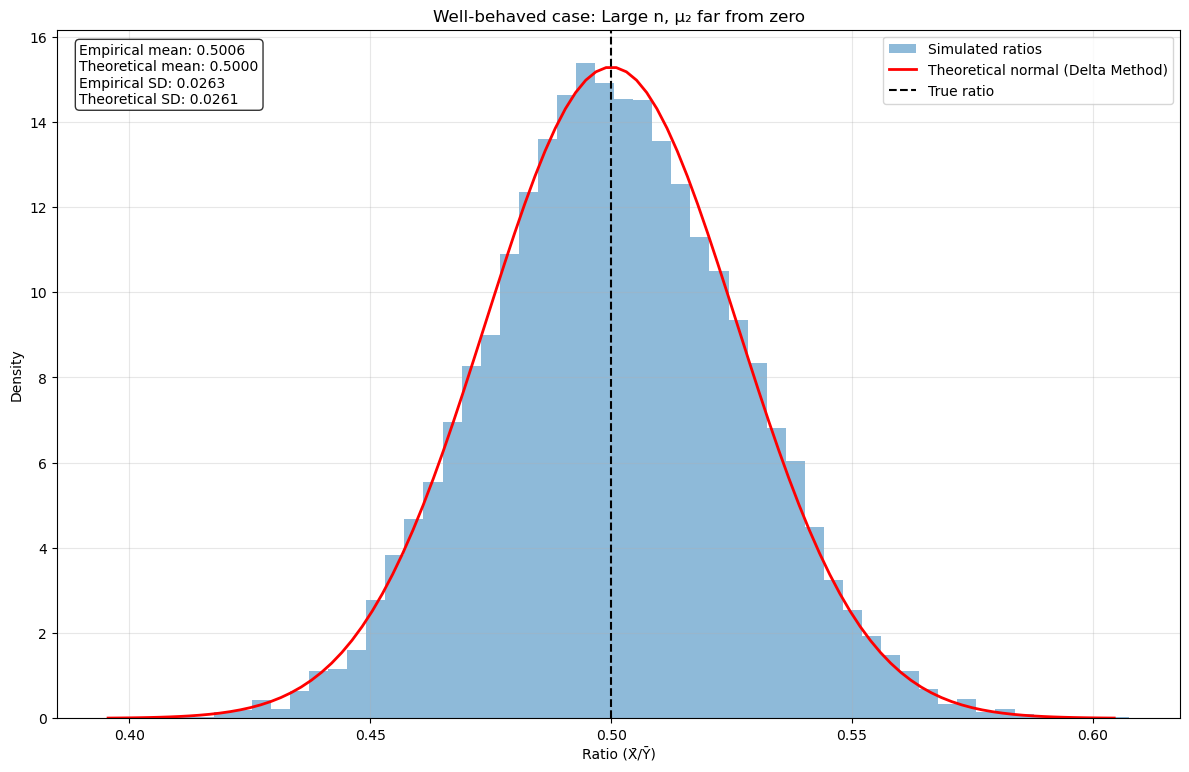

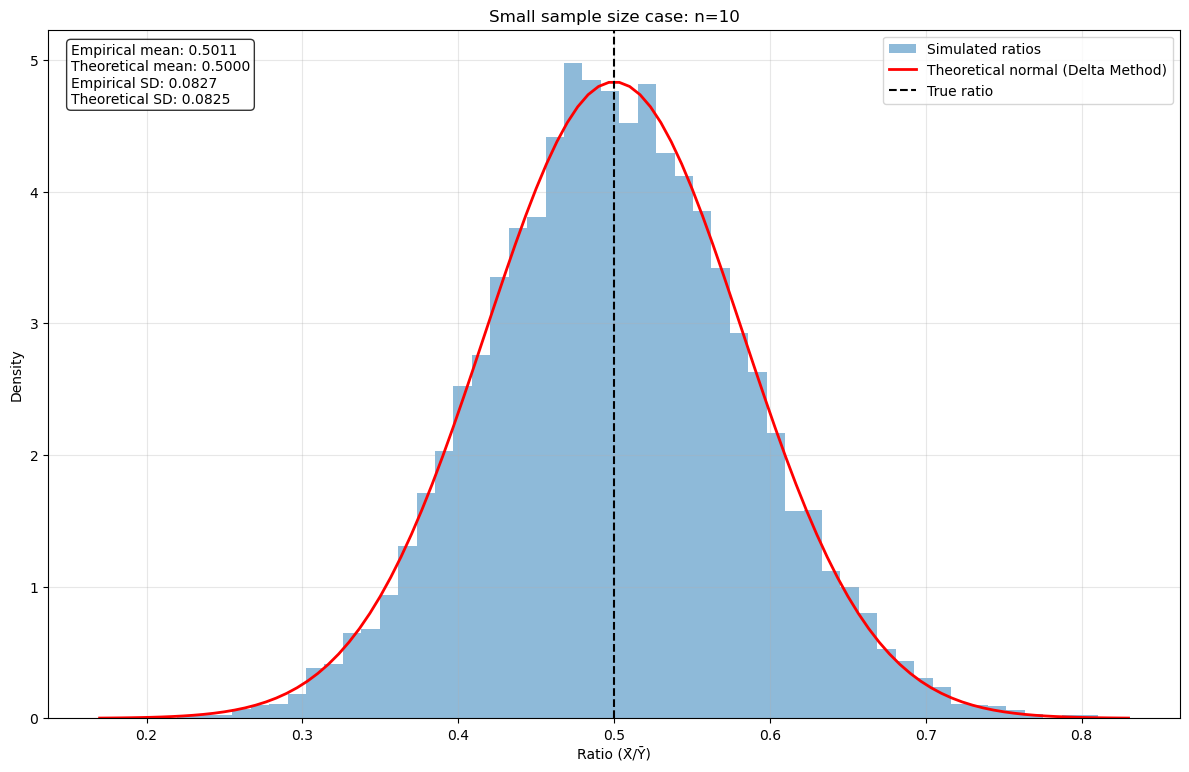

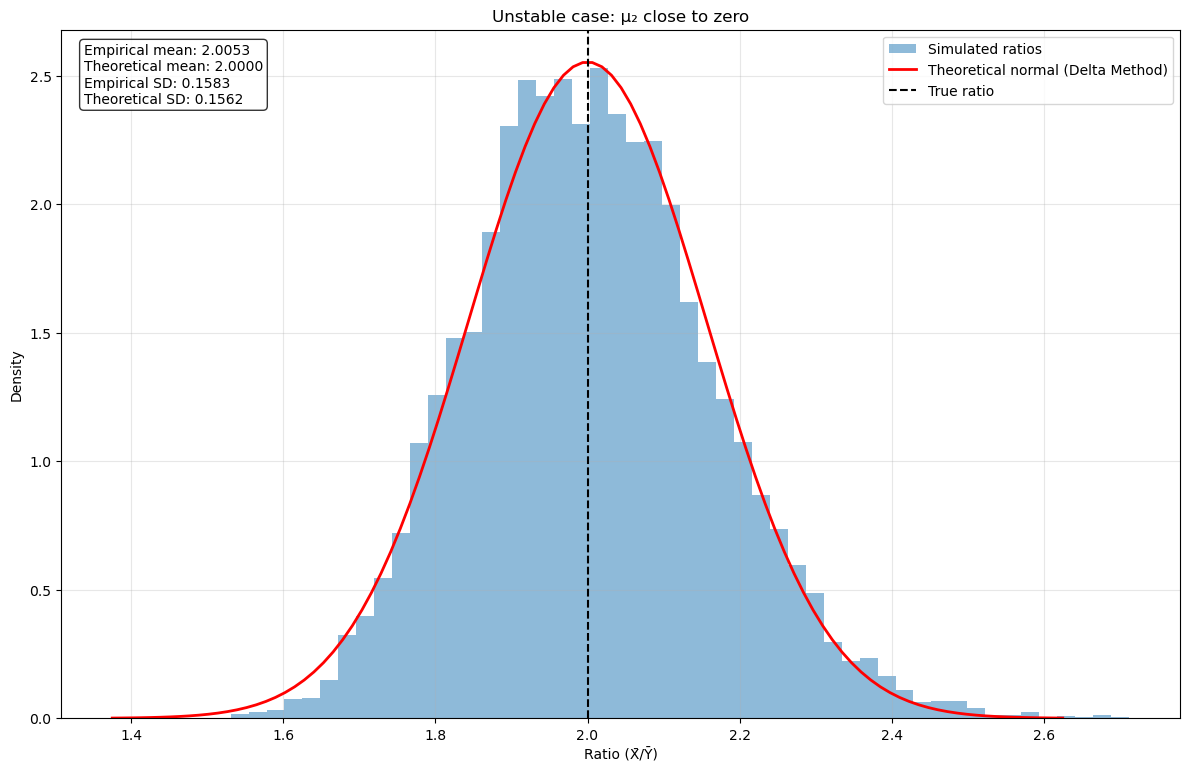

In [3]:
# Example 1: Well-behaved case
fig1 = simulate_delta_method(mu1=1, mu2=2, sigma1=0.5, sigma2=0.3, n=100)
plt.figure(1)
plt.title('Well-behaved case: Large n, μ₂ far from zero')

# Example 2: Small sample size
fig2 = simulate_delta_method(mu1=1, mu2=2, sigma1=0.5, sigma2=0.3, n=10)
plt.figure(2)
plt.title('Small sample size case: n=10')

# Example 3: Denominator close to zero
fig3 = simulate_delta_method(mu1=1, mu2=0.5, sigma1=0.5, sigma2=0.3, n=100)
plt.figure(3)
plt.title('Unstable case: μ₂ close to zero')

plt.show()